In [1]:
import os 
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df= pd.read_csv('TS021-2021-3-filtered-2024-11-21T17_12_47Z.csv')

In [3]:
df.head()

,Lower layer Super Output Areas Code,Lower layer Super Output Areas,Ethnic group (20 categories) Code,Ethnic group (20 categories),Observation
0,E01008288,Newcastle upon Tyne 027A,-8,Does not apply,0
1,E01008288,Newcastle upon Tyne 027A,1,"Asian, Asian British or Asian Welsh: Bangladeshi",29
2,E01008288,Newcastle upon Tyne 027A,2,"Asian, Asian British or Asian Welsh: Chinese",11
3,E01008288,Newcastle upon Tyne 027A,3,"Asian, Asian British or Asian Welsh: Indian",36
4,E01008288,Newcastle upon Tyne 027A,4,"Asian, Asian British or Asian Welsh: Pakistani",52


In [4]:
name = ['Newcastle upon Tyne 039D','Newcastle upon Tyne 038A','Newcastle upon Tyne 038B','Newcastle upon Tyne 038C'
        ,'Newcastle upon Tyne 038D','Newcastle upon Tyne 038E','Newcastle upon Tyne 027D','Newcastle upon Tyne 041A',
        'Newcastle upon Tyne 041B', 'Newcastle upon Tyne 041C']  #All the LSOA in Elswick

In [5]:
df = df[df['Lower layer Super Output Areas'].isin(name)]

In [6]:
df.head(20)

,Lower layer Super Output Areas Code,Lower layer Super Output Areas,Ethnic group (20 categories) Code,Ethnic group (20 categories),Observation
60,E01008291,Newcastle upon Tyne 027D,-8,Does not apply,0
61,E01008291,Newcastle upon Tyne 027D,1,"Asian, Asian British or Asian Welsh: Bangladeshi",138
62,E01008291,Newcastle upon Tyne 027D,2,"Asian, Asian British or Asian Welsh: Chinese",30
63,E01008291,Newcastle upon Tyne 027D,3,"Asian, Asian British or Asian Welsh: Indian",19
64,E01008291,Newcastle upon Tyne 027D,4,"Asian, Asian British or Asian Welsh: Pakistani",55
65,E01008291,Newcastle upon Tyne 027D,5,"Asian, Asian British or Asian Welsh: Other Asian",82
66,E01008291,Newcastle upon Tyne 027D,6,"Black, Black British, Black Welsh, Caribbean o...",286
67,E01008291,Newcastle upon Tyne 027D,7,"Black, Black British, Black Welsh, Caribbean o...",4
68,E01008291,Newcastle upon Tyne 027D,8,"Black, Black British, Black Welsh, Caribbean o...",12
69,E01008291,Newcastle upon Tyne 027D,9,Mixed or Multiple ethnic groups: White and Asian,13


In [7]:
df['Ethnic group (20 categories)'].unique()

array(['Does not apply',
       'Asian, Asian British or Asian Welsh: Bangladeshi',
       'Asian, Asian British or Asian Welsh: Chinese',
       'Asian, Asian British or Asian Welsh: Indian',
       'Asian, Asian British or Asian Welsh: Pakistani',
       'Asian, Asian British or Asian Welsh: Other Asian',
       'Black, Black British, Black Welsh, Caribbean or African: African',
       'Black, Black British, Black Welsh, Caribbean or African: Caribbean',
       'Black, Black British, Black Welsh, Caribbean or African: Other Black',
       'Mixed or Multiple ethnic groups: White and Asian',
       'Mixed or Multiple ethnic groups: White and Black African',
       'Mixed or Multiple ethnic groups: White and Black Caribbean',
       'Mixed or Multiple ethnic groups: Other Mixed or Multiple ethnic groups',
       'White: English, Welsh, Scottish, Northern Irish or British',
       'White: Irish', 'White: Gypsy or Irish Traveller', 'White: Roma',
       'White: Other White', 'Other ethnic

In [8]:
values_to_include = [1, 2, 3, 4, 5, 6, 7, 8, 15, 16, 17, 18, 19] # None British&Irish
noneBI_sum = df[df['Ethnic group (20 categories) Code'].isin(values_to_include)]['Observation'].sum()

In [9]:
noneBI_sum

11769

In [10]:
values_to_include = [9, 10, 11, 12] # Mixed
mixed_sum = df[df['Ethnic group (20 categories) Code'].isin(values_to_include)]['Observation'].sum()

In [11]:
mixed_sum

522

In [12]:
values_to_include = [13, 14] # British&Irish 
BI_sum = df[df['Ethnic group (20 categories) Code'].isin(values_to_include)]['Observation'].sum()

In [13]:
BI_sum

6692

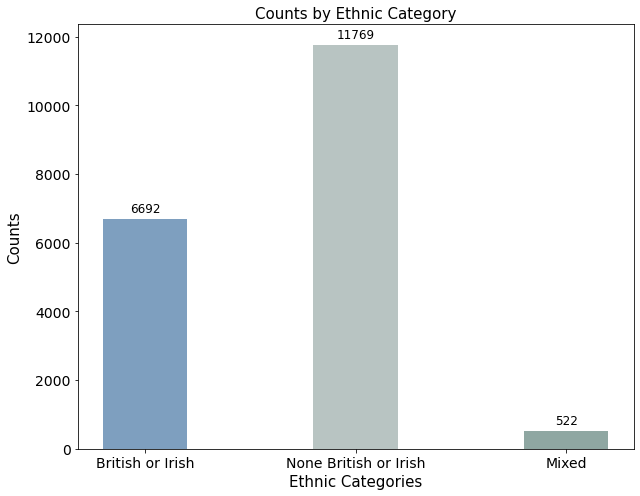

In [19]:
categories = ['British or Irish', 'None British or Irish', 'Mixed']
counts = [BI_sum, noneBI_sum, mixed_sum]

# Create the bar plot
plt.figure(figsize=(9, 7))
plt.bar(categories, counts, color=['#7E9FBF', '#B8C4C2', '#8FA7A2'], width=0.4)

# Add titles and labels
plt.title('Counts by Ethnic Category', fontsize=15)
plt.xlabel('Ethnic Categories', fontsize=15)
plt.xticks(fontsize=14)
plt.ylabel('Counts', fontsize=15)
plt.yticks(fontsize=14)

# Display the count on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count + 200, str(count), ha='center', fontsize=12)

# Show the plot
plt.tight_layout()
plt.savefig('ethnic_category_counts.png', dpi=300, bbox_inches='tight')

plt.show()

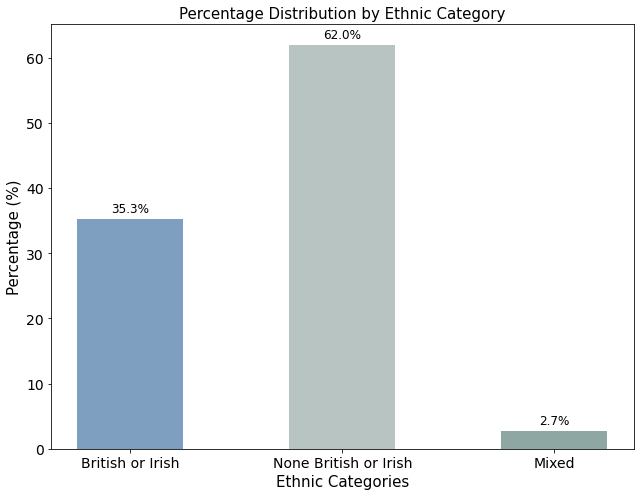

In [23]:
import matplotlib.pyplot as plt

# Data for the bar plot
categories = ['British or Irish', 'None British or Irish', 'Mixed']
counts = [BI_sum, noneBI_sum, mixed_sum]

# Calculate percentages
total = sum(counts)
percentages = [(count / total) * 100 for count in counts]

# Subtle colour scheme
colours = ['#7E9FBF', '#B8C4C2', '#8FA7A2']  # Muted blues and greys

# Create the bar plot
plt.figure(figsize=(9, 7))
plt.bar(categories, percentages, color=colours, width=0.5)

# Add titles and labels
plt.title('Percentage Distribution by Ethnic Category', fontsize=15)
plt.xlabel('Ethnic Categories', fontsize=15)
plt.xticks(fontsize=14)
plt.ylabel('Percentage (%)', fontsize=15)
plt.yticks(fontsize=14)

# Display the percentage on top of each bar
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage:.1f}%', ha='center', fontsize=12)

# Save the plot as a high-resolution PNG
plt.tight_layout()
plt.savefig('ethnic_category_percentage.png', dpi=300, bbox_inches='tight')  # High-res PNG

# Show the plot
plt.show()
